Install dependencies

Download dataset from kaggle

In [123]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhijitdahatonde/worldwide-average-iq-levels")

print("Path to dataset files:", path)

Path to dataset files: /Users/Gala/.cache/kagglehub/datasets/abhijitdahatonde/worldwide-average-iq-levels/versions/1


Create path to file

In [125]:
import os
import pandas as pd

# Create path to file 
csv_file_path = os.path.join(path, "IQ_level.csv")

# Read data
df = pd.read_csv(csv_file_path)

# Print information about data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


Cleanup

In [136]:
import pandas as pd
import numpy as np

# Check missing data
print(df.isnull().sum())

# Filling in the gaps with median values (more robust to outliers)
df.fillna({'education_expenditure': df['education_expenditure'].median(),'avg_income': df['avg_income'].median()}, inplace=True)

# Check outliers
Q1 = df['IQ'].quantile(0.25)
Q3 = df['IQ'].quantile(0.75)
IQR = Q3 - Q1

# Removal of abnormal values
df = df[~((df['IQ'] < (Q1 - 1.5 * IQR)) | (df['IQ'] > (Q3 + 1.5 * IQR)))]

print("Data cleaned successfully!")


rank                     0
country                  0
IQ                       0
education_expenditure    0
avg_income               0
avg_temp                 0
dtype: int64
Data cleaned successfully!


In [137]:
# Clean data
df_cleaned = df.dropna(subset=['education_expenditure', 'avg_income'])

Remove duplicates

Identify missing data


In [175]:
missing_data = df.isnull()
missing_data_sum = df.isnull().sum()
missing_data_sum

rank                     0
country                  0
IQ                       0
education_expenditure    0
avg_income               0
avg_temp                 0
dtype: int64

# Step 2: Analyze data and identify patterns

## 2.1. Сorrelation analysis

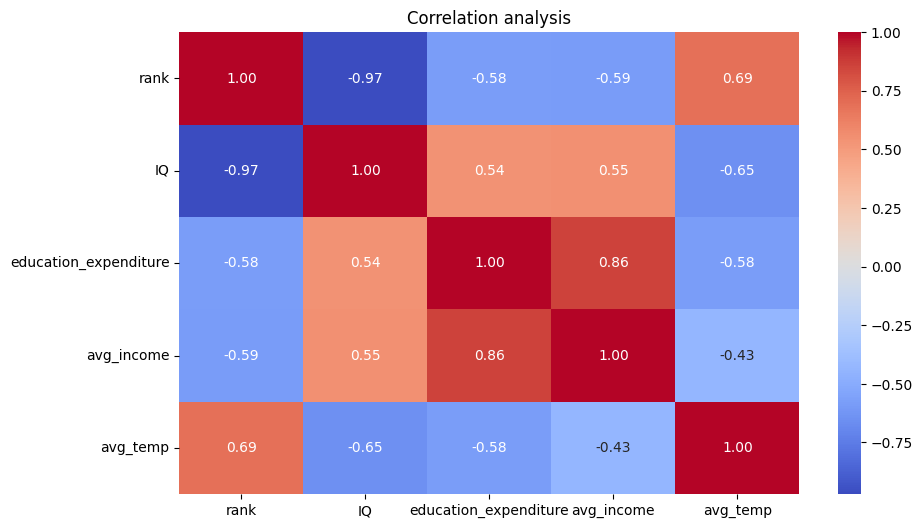

In [150]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Сorrelation analysis')
plt.show()


Positive Correlation (Values close to +1): When two variables have a correlation coefficient close to +1, they are positively correlated, meaning as one variable increases, the other tends to increase as well.
Negative Correlation (Values close to -1): A negative correlation means that as one variable increases, the other tends to decrease.

### Influence of temperature on level IQ

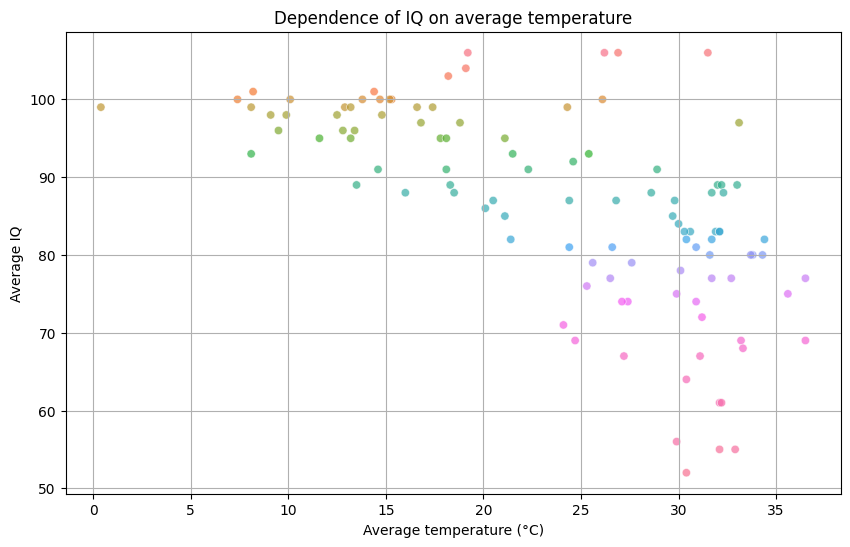

In [160]:
# IQ depending on climatic conditions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='IQ', data=df, hue='country', legend=False, alpha=0.7)
plt.title('Dependence of IQ on average temperature')
plt.xlabel('Average temperature (°C)')
plt.ylabel('Average IQ')
plt.grid(True)
plt.show()

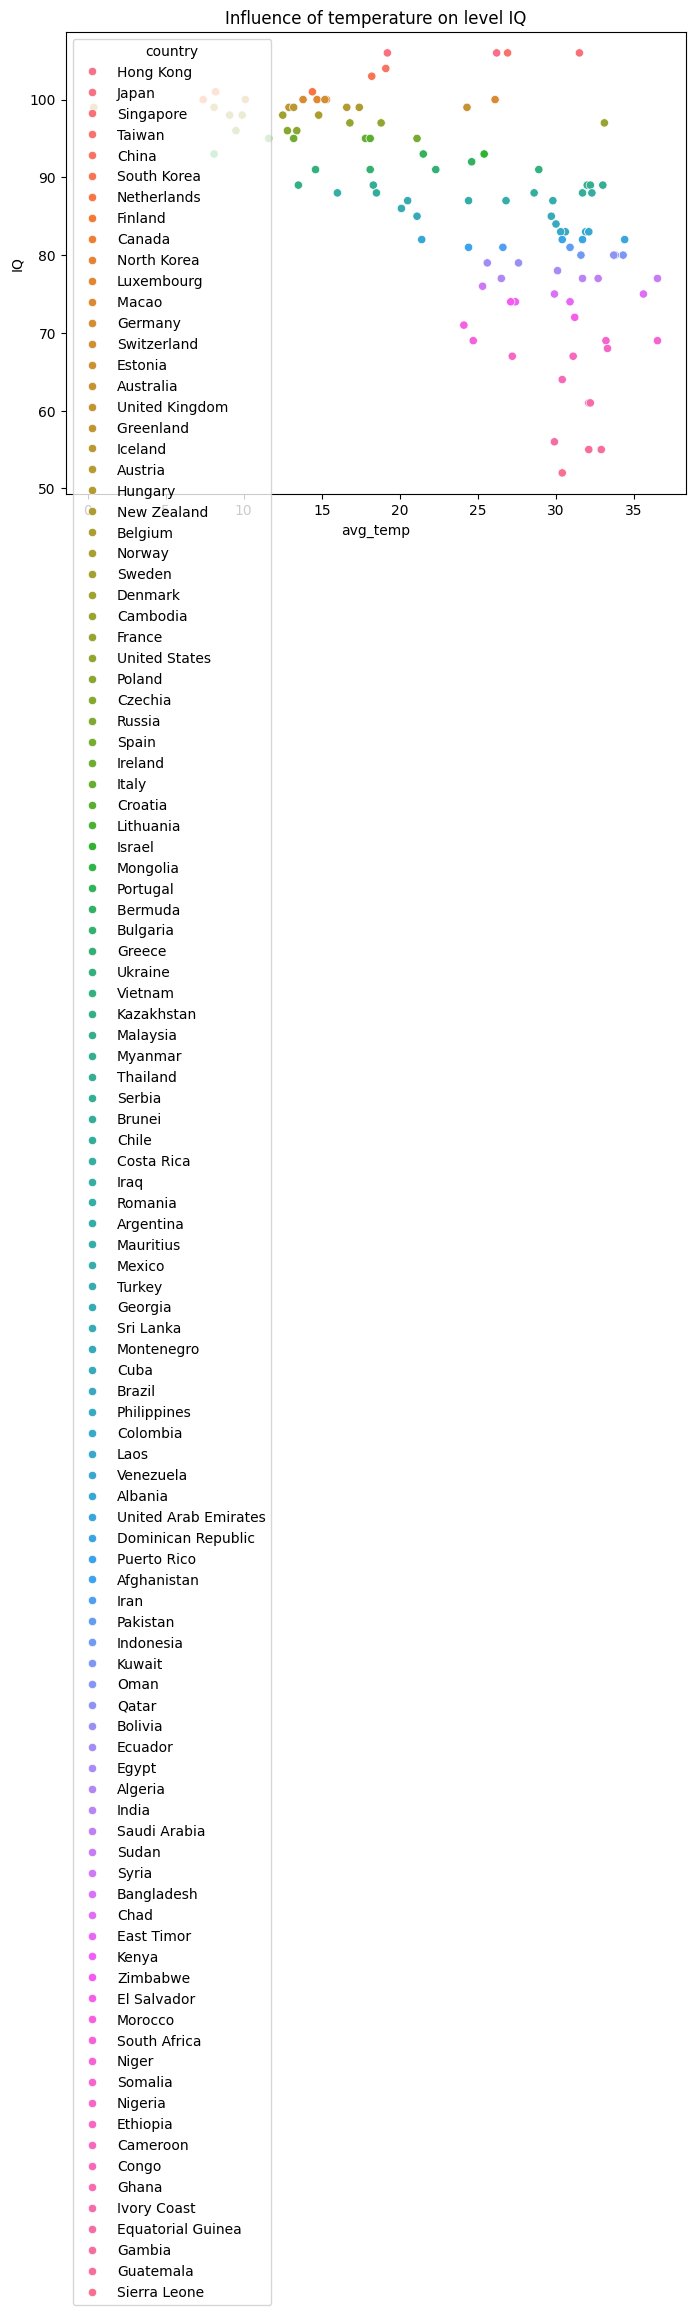

In [161]:
# Influence of temperature on level IQ

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_temp', y='IQ', hue='country')
plt.title('Influence of temperature on level IQ')
plt.show()


Statistical analysis indicates a correlation between average temperatures and IQ scores across countries. However, it is important to approach these findings with caution, as correlation does not imply causation, and various socio-economic, educational, and cultural factors can influence both temperature and cognitive development. 

### Education Expenditure vs. Average IQ

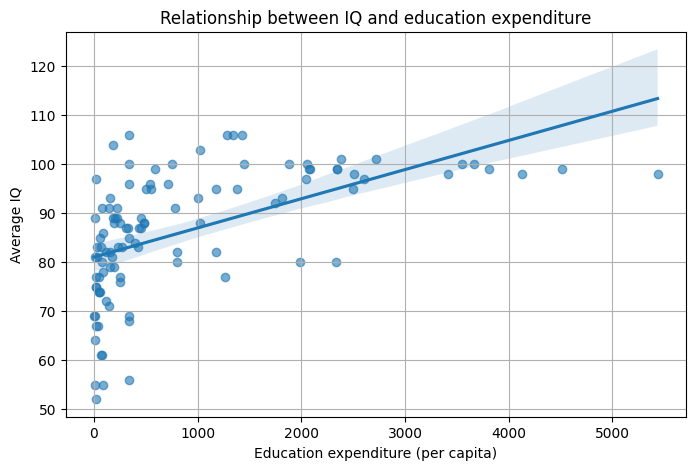

In [163]:
# Relationship between IQ and education expenditure
plt.figure(figsize=(8, 5))
sns.regplot(x='education_expenditure', y='IQ', data=df_cleaned, scatter_kws={"alpha": 0.6})
plt.title('Relationship between IQ and education expenditure')
plt.xlabel('Education expenditure (per capita)')
plt.ylabel('Average IQ')
plt.grid(True)
plt.show()

This plot explores the relationship between the amount of money spent on education per capita (education expenditure) and the average IQ of a population in different countries or regions.
The plot shows a positive trend (upward slope), it means that higher education expenditure is associated with higher average IQ.

In [179]:
import plotly.express as px

# Визуализация зависимости IQ от образовательных расходов
fig = px.scatter(df, x='education_expenditure', y='IQ', color='country', size='avg_income', hover_name='country')
fig.update_layout(title='Влияние образовательных расходов на IQ')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Average Income vs. Average IQ

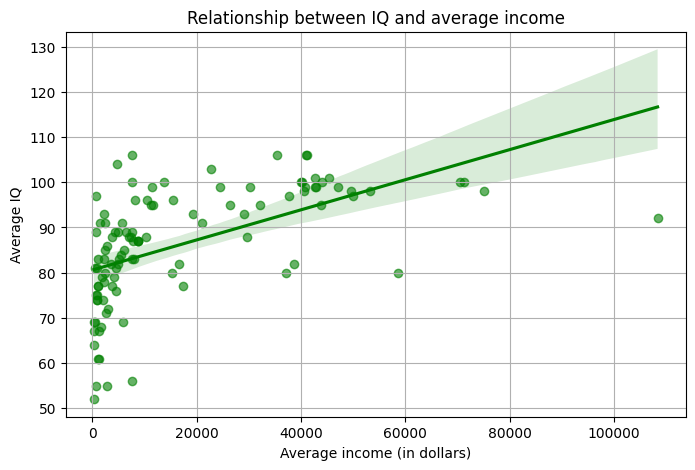

In [165]:
# Relationship between average income and IQ

plt.figure(figsize=(8, 5))
sns.regplot(x='avg_income', y='IQ', data=df_cleaned, scatter_kws={"alpha": 0.6}, color='green')
plt.title('Relationship between IQ and average income')
plt.xlabel('Average income (in dollars)')
plt.ylabel('Average IQ')
plt.grid(True)
plt.show()

This plot investigates the relationship between average income (per capita) and average IQ across countries or regions.

A positive correlation would suggest that wealthier countries or regions tend to have higher average IQs.

### Countries with the highest and lowest IQ scores

Counties with the highest IQ:
 country
Hong Kong      106.0
Japan          106.0
Singapore      106.0
Taiwan         106.0
China          104.0
South Korea    103.0
Finland        101.0
Netherlands    101.0
Canada         100.0
Estonia        100.0
Name: IQ, dtype: float64
Countries with the lowest  IQ:
 country
Sierra Leone         52.0
Gambia               55.0
Guatemala            55.0
Equatorial Guinea    56.0
Ghana                61.0
Ivory Coast          61.0
Congo                64.0
Cameroon             67.0
Ethiopia             67.0
Nigeria              68.0
Name: IQ, dtype: float64


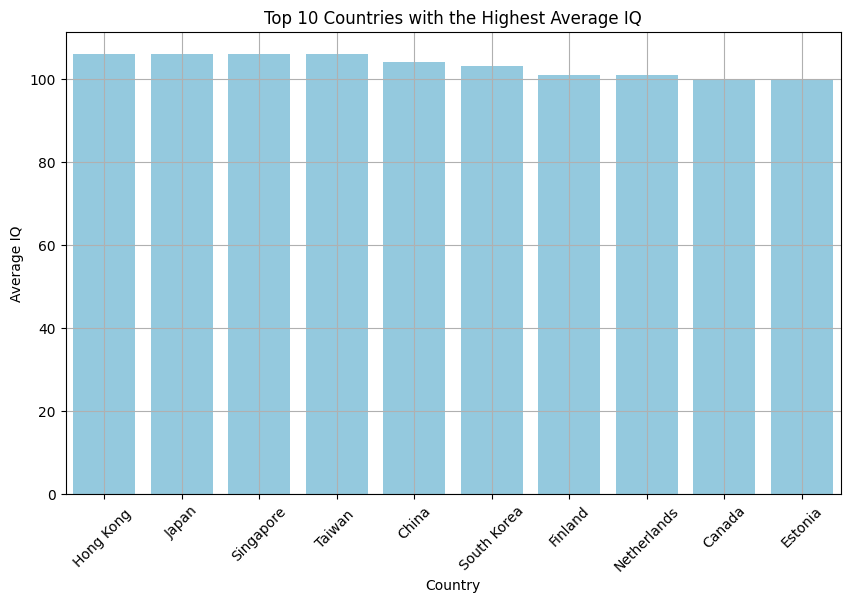

In [171]:
top_countries = df.groupby('country')['IQ'].mean().nlargest(10)
low_countries = df.groupby('country')['IQ'].mean().nsmallest(10)

print("Counties with the highest IQ:\n", top_countries)
print("Countries with the lowest  IQ:\n", low_countries)

# Visualize countries with the highest average IQ
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, color='skyblue')  # Using a solid color instead of a palette

plt.title('Top 10 Countries with the Highest Average IQ')
plt.xlabel('Country')
plt.ylabel('Average IQ')
plt.xticks(rotation=45)  # Rotate the country names if they are long
plt.grid(True)
plt.show()


# Step 3. Application of AI and Predictive Models

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Выбор признаков и целевой переменной
X = df[['education_expenditure', 'avg_income', 'avg_temp']]
y = df['IQ']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка модели
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


ModuleNotFoundError: No module named 'sklearn'

# Этап 4: Оценка этических аспектов

Этап не требует кода, но можно провести проверку на возможные предвзятости в данных.
Например, проверить, не доминирует ли в данных один регион или не занижены ли показатели для стран с более низким уровнем дохода.

In [144]:
region_counts = df['country'].value_counts()
print("Распределение стран по количеству записей:\n", region_counts)


Распределение стран по количеству записей:
 country
Hong Kong       1
Ecuador         1
Qatar           1
Oman            1
Kuwait          1
               ..
Spain           1
Russia          1
Czechia         1
Poland          1
Sierra Leone    1
Name: count, Length: 107, dtype: int64


# Этап 5: Визуализация и презентация

# Этап 6: Итоговые рекомендации


На основе данных можно рекомендовать:

Увеличение расходов на образование в странах с низкими показателями IQ.

Программы повышения когнитивных способностей в регионах с экстремальными климатическими условиями.

Фокус на комплексных мерах, включая улучшение уровня жизни и доступа к образованию.


In [178]:
import plotly.express as px

# Example DataFrame: make sure 'country' corresponds to valid country names or ISO codes
# and 'IQ' is the numeric value you want to display.
fig = px.choropleth(
    df, 
    locations="country",         # Column with country names or ISO codes
    locationmode="country names",  # Change to "ISO-3" if you're using ISO codes
    color="IQ",                  # Column with the numeric value
    hover_name="country",        # Column to display when hovering over a country
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    title="Geographic Heat Map of Average IQ"
)

fig.show()


ModuleNotFoundError: No module named 'plotly'